# Analysis of SEIRX model runs for test technology and vaccination ratios

In [6]:
import pandas as pd
import numpy as np
from os.path import join
import analysis_functions as af

In [8]:
language = 'english' # English or German
# vaccination ratios of (employee, resident) groups corresponding to the
# different vaccination scenarios
vaccination_scenarios = [(0, 0), (0.5, 0.0), (0.0, 0.5), (0.5, 0.9), (0.9, 0.9)]

In [9]:
# get the right plot labels given the language
test_name_map = af.label_map[language]['test_name_map']
frequency_name_map = af.label_map[language]['frequency_name_map']

if language == 'english':
    screening_intervals = ['never', 'once\na week', 'twice\na week', 
                           '3 times\na week']
    
    vacc_scenario_labels = ['no\nvaccination', 'emp. 50%\nres. 0%', 
                            'emp. 0%\nres. 50%',  'emp. 50%\nres. 90%',
                             'emp. 90%\nres. 90%']
    
    test_strat_labels = ['testing employees 2x/week',
                         'testing everyone 1x/week',
                         'no testing']
if language == 'german':
    screening_intervals = ['nie', 'ein mal\npro Woche', '2 mal\npro Woche',
                           '3 mal\npro Woche']

    vacc_scenario_labels = ['keine\nImpfungen', 'Mit. 50%\nBew. 0%', 
                            'Mit. 0%\nBew. 50%',  'Mit. 50%\nBew. 90%',
                             'Mit. 90%\Bew. 90%']
    
    test_strat_labels = ['Testen MitarbeiterInnen 2x/Woche',
                         'Testen alle 1x/Woche',
                         'keine Tests']
    


## Analysis B.1.1.7

### Violin plots

#### Load simulation results

In [13]:
test_types = ['same_day_antigen', 'same_day_PCR', None]
index_cases = ['employee', 'resident']
vaccination_scenarios_and_labels = [
                         (0.5, 0.0, vacc_scenario_labels[1]),
                         (0.0, 0.5, vacc_scenario_labels[2]),
                         (0.5, 0.9, vacc_scenario_labels[3]),
                         #(0.9, 0.9, vacc_scenario_labels[3])
                        ]

testing_strats = [(3, None, test_strat_labels[0]),
                     (7, 7, test_strat_labels[1])]

testing_scenarios = np.asarray([
        test_strat_labels[0] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[0] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[2] + '\n' + test_name_map[test_types[2]]])

In [14]:
# load the vaccination scenario X testing strategy data
ensmbl_src = '../data/simulation_results/ensembles/testing_and_vaccination'
params = [(t, i, j, k, l, m, n, o) \
             for t in test_types[0:2]
             for i in index_cases\
             for j, k, l in testing_strats\
             for m, n, o in vaccination_scenarios_and_labels]

ensmbls = pd.DataFrame()
for p in params:
    ensmbls = pd.concat([ensmbls, 
            af.load_ensmbl(p, test_name_map, ensmbl_src, variant='UK_variant')])

In [15]:
# load the baseline data (only testing strategies)
ensmbl_src = '../data/simulation_results/ensembles/testing_strategy'
params = [(t, i, j, k, l, vacc_scenario_labels[0]) \
          for t in test_types[0:2]\
          for i in index_cases\
          for j, k, l in testing_strats]

baseline_ensmbls = pd.DataFrame()
for p in params:
    baseline_ensmbls = pd.concat([baseline_ensmbls, 
                        af.load_baseline_ensmbl(p, test_name_map,
                                    ensmbl_src, variant='UK_variant')])

In [16]:
# load the data without testing
ensmbl_src = '../data/simulation_results/ensembles/vaccination/'
params = [(None, i, None, None, test_strat_labels[2], j, k, l) \
          for i in index_cases \
          for j, k, l in vaccination_scenarios_and_labels]

no_test_ensmbls = pd.DataFrame()
for p in params:
    no_test_ensmbls = pd.concat([no_test_ensmbls, 
        af.load_no_test_ensmbl(p, test_name_map, ensmbl_src, variant='UK_variant')])

In [17]:
# load the data without testing and vaccinations
ensmbl_src = '../data/simulation_results/ensembles/TTI'
params = [(None, i, None, None, test_strat_labels[2], 0, 0, vacc_scenario_labels[0]) \
          for i in index_cases]

TTI_ensmbl = pd.DataFrame()
for p in params:
    TTI_ensmbl = pd.concat([TTI_ensmbl, 
                    af.load_TTI_ensmbl(p, ensmbl_src, variant='UK_variant')])


In [18]:
ensmbls = pd.concat([ensmbls, baseline_ensmbls,
                     no_test_ensmbls, TTI_ensmbl])

#### Plots

**Testing scenarios**
* Employees screened 2x / week with antigen tests, residents never
* Employees screened 2x / week with PCR tests, residents never
* No testing

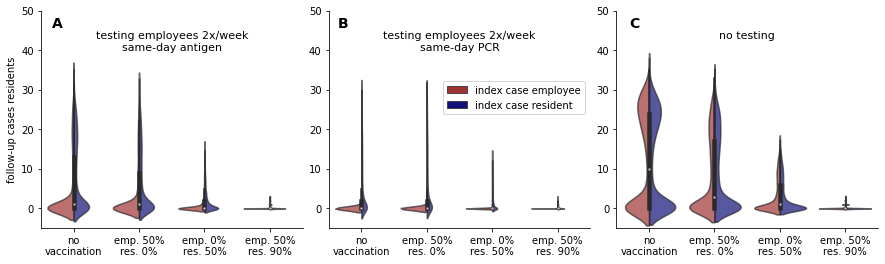

In [22]:
af.plot_violins2(ensmbls, 'infected_residents', testing_scenarios[[0, 1, 4]],
            vacc_scenario_labels[0:4], language, ymin=-5, ymax=50,
            variant='_UK_variant')

**Testing**
* Employees screened 2x / week with antigen tests, residents never
* Employees screened 2x / week with PCR tests, residents never
* Employees screened 1x / week, residents screened 1x / week, both with antigen tests
* Employees screened 1x / week, residents screened 1x / week, both with PCR tests

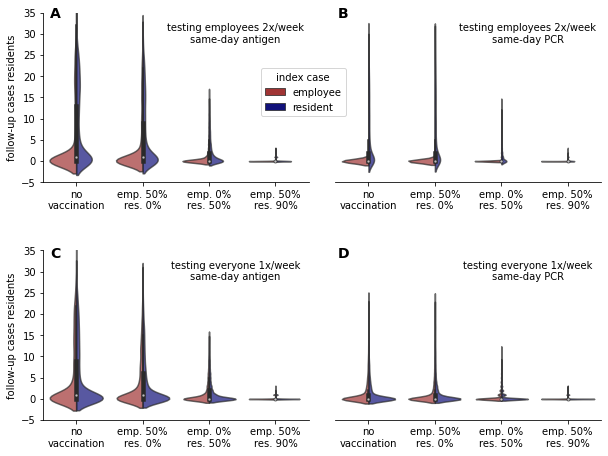

In [24]:
af.plot_violins(ensmbls, 'infected_residents', testing_scenarios[0:4],
             vacc_scenario_labels[0:4], language, ymin=-5, ymax=35,
             variant='_UK_variant')

### Colormaps for different vaccination scenarios

#### Load the simulation results

In [25]:
N_runs = 5000
sim_name = 'simulations_testing_and_vaccination_UK_variant_{}.csv'.format(N_runs)
res_path = '../data/simulation_results'
dst_path = '../plots'

In [29]:
data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
data['resident_screen_interval'] = data['resident_screen_interval']\
    .replace(frequency_name_map)
data['employee_screen_interval'] = data['employee_screen_interval']\
    .replace(frequency_name_map)

data = data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [30]:
N_runs = 5000
sim_name = 'simulations_testing_strategy_UK_variant_{}.csv'.format(N_runs)

In [31]:
no_vacc_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_vacc_data['resident_screen_interval'] = no_vacc_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_screen_interval'] = no_vacc_data['employee_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_vaccination_ratio'] = 0.0
no_vacc_data['resident_vaccination_ratio'] = 0.0

no_vacc_data = no_vacc_data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [32]:
data = pd.concat([data, no_vacc_data])

In [33]:
N_runs = 5000
sim_name = 'simulations_vaccination_rate_UK_variant_{}.csv'.format(N_runs)

In [34]:
no_test_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_test_data['resident_screen_interval'] = no_test_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_test_data['employee_screen_interval'] = no_test_data['employee_screen_interval']\
    .replace(frequency_name_map)

no_test_data = no_test_data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

#### Plots

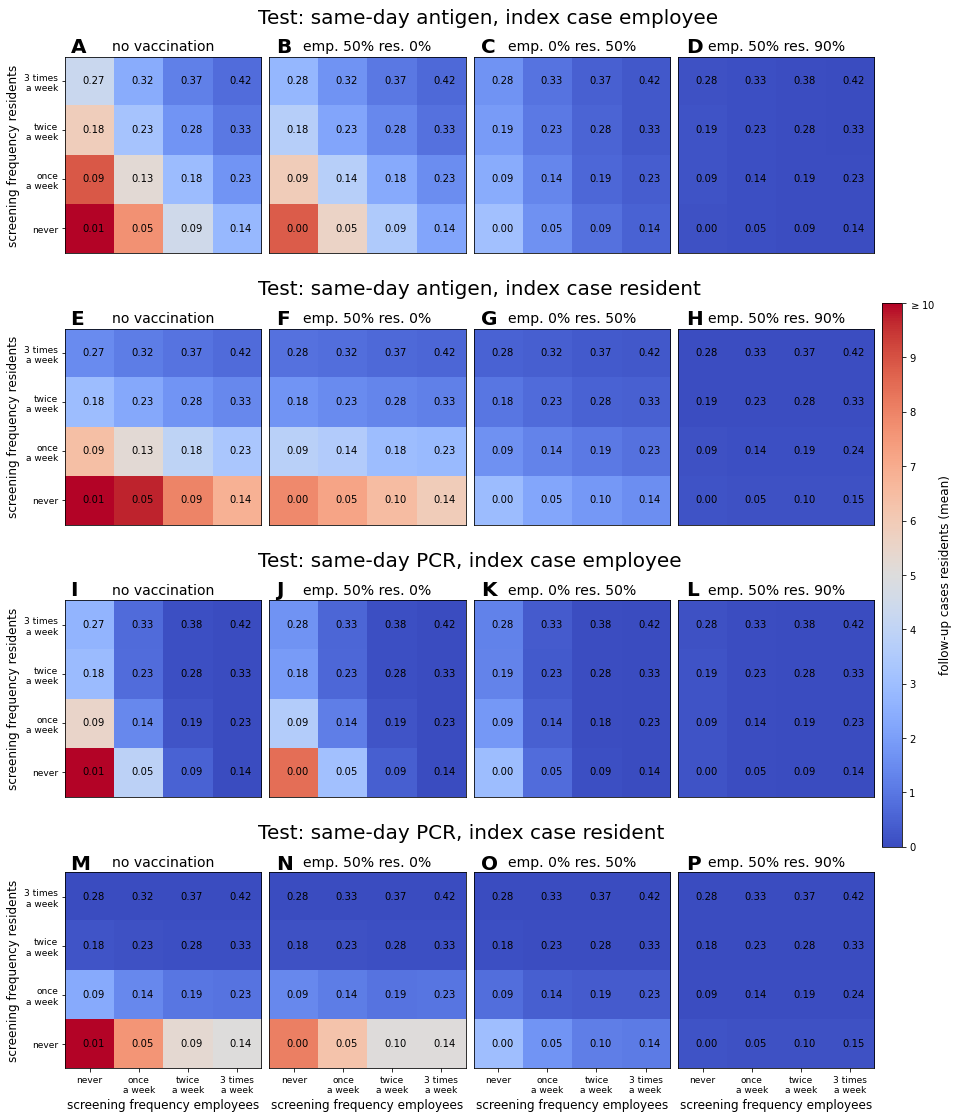

In [39]:
af.plot_testing_strategy_vaccination_scenario_grid(\
    data, 'infected_residents_mean', screening_intervals,
    vaccination_scenarios[0:4], vacc_scenario_labels, language,
    variant='_UK_variant', vmax=10, vstep=1)

### Outbreak sizes

#### Antigen tests & 50% vaccinated residents

In [40]:
mean = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.8798 +- 2.101008045429953


In [41]:
mean = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.8559999999999999 +- 2.805287494640348


#### PCR tests & 0% vaccinated residents, 0% vaccinated employees

In [42]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.5202 +- 2.7129069156140537


In [43]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

5.2848 +- 6.868094575981094


#### PCR tests & 0% vaccinated residents, 50% vaccinated employees

In [44]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.4412 +- 2.416218156962737


In [45]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

5.0684 +- 6.7097783618487


#### PCR tests & 50% vaccinated residents

In [46]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.5202 +- 2.7129069156140537


In [47]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.1838000000000002 +- 1.9861537003223744


#### PCR tests & 90% vaccinated residents, 50% vaccinated employees

In [48]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0076 +- 0.0956246245156693


In [49]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.13139999999999996 +- 0.3727758473486088


#### Antigen tests & 90% vaccinated residents, 50% vaccinated employees

In [50]:
mean = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0518 +- 0.2504581918428148


In [51]:
mean = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.13339999999999996 +- 0.3965298061652308


#### No tests & 90% vaccinated residents, 50% vaccinated employees

In [52]:
mean = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_mean']
std = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.168 +- 0.4580589084306936


In [53]:
mean = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_mean'] - 1
std = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.17599999999999993 +- 0.4628896773213614


## Analysis wild type

In [68]:
N_runs = 5000
sim_name = 'simulations_testing_and_vaccination_{}.csv'.format(N_runs)
res_path = '../data/simulation_results'
dst_path = '../plots'

In [69]:
data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
data['resident_screen_interval'] = data['resident_screen_interval']\
    .replace(frequency_name_map)
data['employee_screen_interval'] = data['employee_screen_interval']\
    .replace(frequency_name_map)

data = data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

### Violin plots

**Realistic scenarios**
* Employees screened 2x / week, residents never, index resident
* Employees screened 2x / week, residents never, index employee
* Employees screened 1x / week, residents screened 1x / week, index resident
* Employees screened 1x / week, residents screened 1x / week, index employee

#### Load simulation results

In [70]:
test_types = ['same_day_antigen', 'same_day_PCR', None]
index_cases = ['employee', 'resident']
vaccination_scenarios_and_labels = [
                         (0.5, 0.0, vacc_scenario_labels[1]),
                         (0.0, 0.5, vacc_scenario_labels[2]),
                         (0.5, 0.9, vacc_scenario_labels[3]),
                         #(0.9, 0.9, vacc_scenario_labels[3])
                        ]

testing_strats = [(3, None, test_strat_labels[0]),
                     (7, 7, test_strat_labels[1])]

testing_scenarios = np.asarray([
        test_strat_labels[0] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[0] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[2] + '\n' + test_name_map[test_types[2]]])

In [74]:
# load the vaccination scenario X testing strategy data
ensmbl_src = '../data/simulation_results/ensembles/testing_and_vaccination'
params = [(t, i, j, k, l, m, n, o) \
             for t in test_types[0:2]
             for i in index_cases\
             for j, k, l in testing_strats\
             for m, n, o in vaccination_scenarios_and_labels]

ensmbls = pd.DataFrame()
for p in params:
    ensmbls = pd.concat([ensmbls, 
            af.load_ensmbl(p, test_name_map, ensmbl_src)])

In [75]:
# load the baseline data (only testing strategies)
ensmbl_src = '../data/simulation_results/ensembles/testing_strategy'
params = [(t, i, j, k, l, vacc_scenario_labels[0]) \
          for t in test_types[0:2]\
          for i in index_cases\
          for j, k, l in testing_strats]

baseline_ensmbls = pd.DataFrame()
for p in params:
    baseline_ensmbls = pd.concat([baseline_ensmbls, 
                        af.load_baseline_ensmbl(p, test_name_map,
                                    ensmbl_src)])

In [76]:
# load the data without testing
ensmbl_src = '../data/simulation_results/ensembles/vaccination/'
params = [(None, i, None, None, test_strat_labels[2], j, k, l) \
          for i in index_cases \
          for j, k, l in vaccination_scenarios_and_labels]

no_test_ensmbls = pd.DataFrame()
for p in params:
    no_test_ensmbls = pd.concat([no_test_ensmbls, 
        af.load_no_test_ensmbl(p, test_name_map, ensmbl_src)])

In [77]:
# load the data without testing and vaccinations
ensmbl_src = '../data/simulation_results/ensembles/TTI'
params = [(None, i, None, None, test_strat_labels[2], 0, 0, vacc_scenario_labels[0]) \
          for i in index_cases]

TTI_ensmbl = pd.DataFrame()
for p in params:
    TTI_ensmbl = pd.concat([TTI_ensmbl, 
                    af.load_TTI_ensmbl(p, ensmbl_src)])


In [78]:
ensmbls = pd.concat([ensmbls, baseline_ensmbls,
                     no_test_ensmbls, TTI_ensmbl])

#### Plots

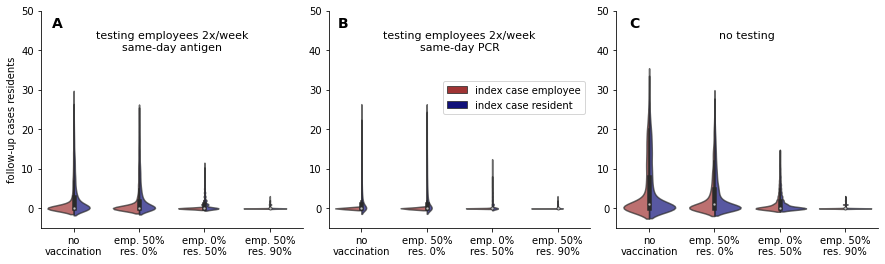

In [79]:
af.plot_violins2(ensmbls, 'infected_residents', testing_scenarios[[0, 1, 4]],
            vacc_scenario_labels[0:4], language, ymin=-5, ymax=50,
            variant='')

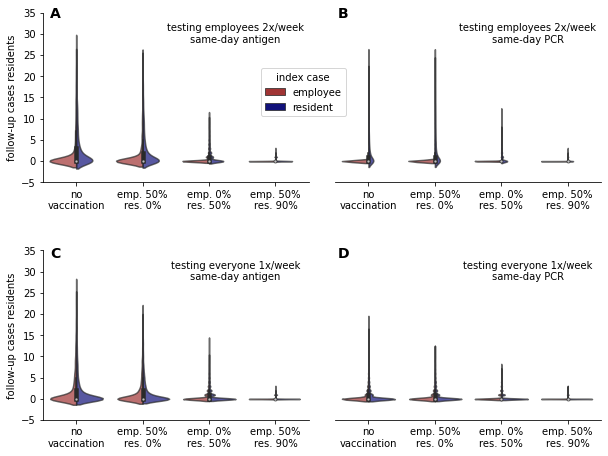

In [80]:
af.plot_violins(ensmbls, 'infected_residents', testing_scenarios[0:4],
             vacc_scenario_labels[0:4], language, ymin=-5, ymax=35)

### Colormaps for different vaccination scenarios

In [81]:
N_runs = 5000
sim_name = 'simulations_testing_and_vaccination_{}.csv'.format(N_runs)
res_path = '../data/simulation_results'
dst_path = '../plots'

In [82]:
data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
data['resident_screen_interval'] = data['resident_screen_interval']\
    .replace(frequency_name_map)
data['employee_screen_interval'] = data['employee_screen_interval']\
    .replace(frequency_name_map)

data = data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [83]:
N_runs = 5000
sim_name = 'simulations_testing_strategy_{}.csv'.format(N_runs)

In [84]:
no_vacc_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_vacc_data['resident_screen_interval'] = no_vacc_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_screen_interval'] = no_vacc_data['employee_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_vaccination_ratio'] = 0.0
no_vacc_data['resident_vaccination_ratio'] = 0.0

no_vacc_data = no_vacc_data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [85]:
data = pd.concat([data, no_vacc_data])

In [86]:
N_runs = 5000
sim_name = 'simulations_vaccination_rate_{}.csv'.format(N_runs)

In [87]:
no_test_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_test_data['resident_screen_interval'] = no_test_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_test_data['employee_screen_interval'] = no_test_data['employee_screen_interval']\
    .replace(frequency_name_map)

no_test_data = no_test_data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

#### Plots

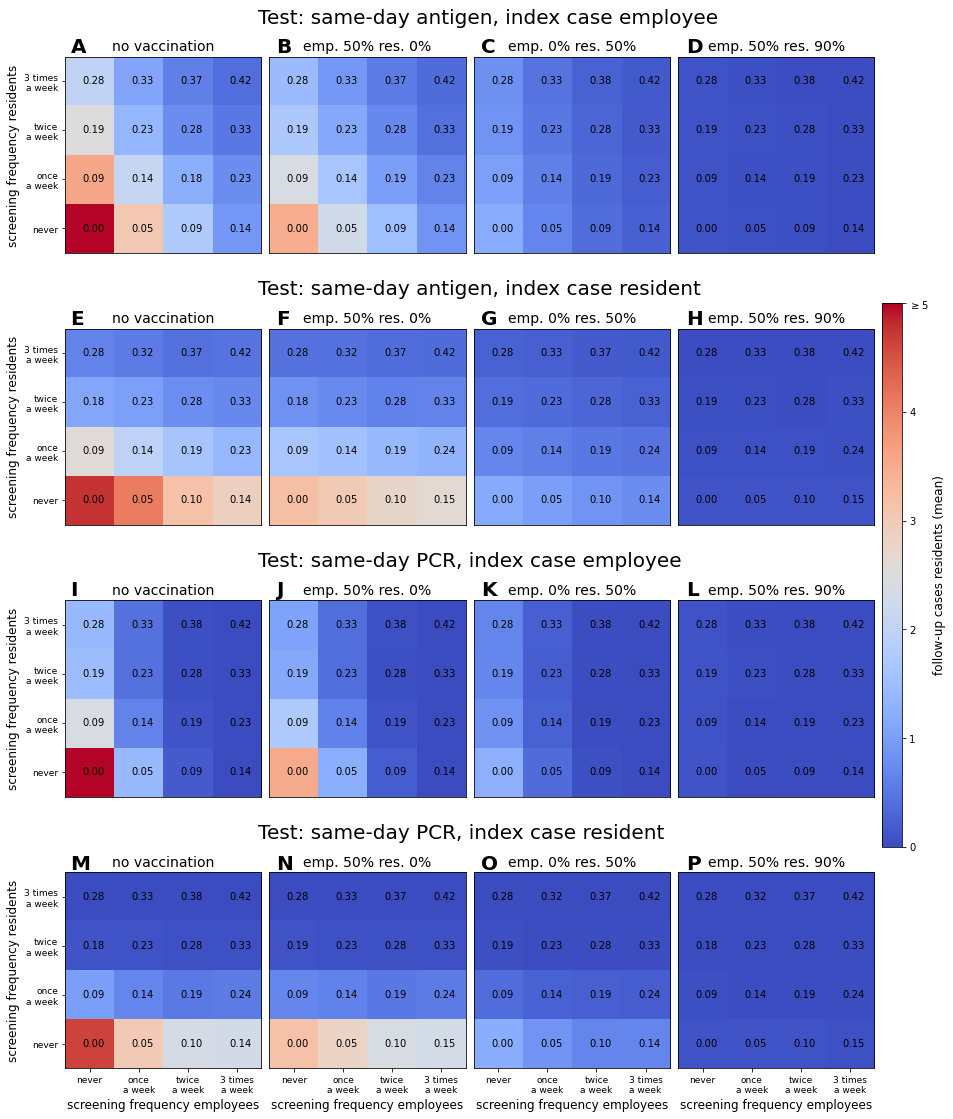

In [90]:
af.plot_testing_strategy_vaccination_scenario_grid(\
    data, 'infected_residents_mean', screening_intervals,
    vaccination_scenarios[0:4], vacc_scenario_labels, language,
    vmax=5, vstep=1)

### Outbreak sizes

#### Antigen tests & 50% vaccinated residents

In [91]:
mean = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.3902 +- 1.0765573626848828


In [92]:
mean = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.8752 +- 1.5404218707574824


#### PCR tests & 0% vaccinated residents, 0% vaccinated employees

In [93]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1782 +- 1.2336730319780709


In [94]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

2.3536 +- 3.781828590179241


#### PCR tests & 0% vaccinated residents, 50% vaccinated employees

In [95]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1976 +- 1.249026121924858


In [96]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

2.3834 +- 3.7342192381626087


#### PCR tests & 50% vaccinated residents

In [97]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1782 +- 1.2336730319780709


In [98]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.6754 +- 1.2623603093848217


#### PCR tests & 90% vaccinated residents, 50% vaccinated employees

In [99]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0038 +- 0.0647023746044601


In [100]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.08499999999999996 +- 0.2996547323032265


#### Antigen tests & 90% vaccinated residents, 50% vaccinated employees

In [101]:
mean = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0426 +- 0.2181622308095293


In [102]:
mean = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0988 +- 0.3332578163440895


#### No tests & 90% vaccinated residents, 50% vaccinated employees

In [103]:
mean = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_mean']
std = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0922 +- 0.3176780506562796


In [104]:
mean = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_mean'] - 1
std = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.09699999999999998 +- 0.3193922389170658


## Analysis B.1.1.7 & employee masks

### Violin plots

#### Load simulation results

In [105]:
test_types = ['same_day_antigen', 'same_day_PCR', None]
index_cases = ['employee', 'resident']
vaccination_scenarios_and_labels = [
                         (0.5, 0.0, vacc_scenario_labels[1]),
                         (0.0, 0.5, vacc_scenario_labels[2]),
                         (0.5, 0.9, vacc_scenario_labels[3]),
                         #(0.9, 0.9, vacc_scenario_labels[3])
                        ]

testing_strats = [(3, None, test_strat_labels[0]),
                     (7, 7, test_strat_labels[1])]

testing_scenarios = np.asarray([
        test_strat_labels[0] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[0] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[0]],
        test_strat_labels[1] + '\n' + test_name_map[test_types[1]],
        test_strat_labels[2] + '\n' + test_name_map[test_types[2]]])

In [106]:
# load the vaccination scenario X testing strategy data
ensmbl_src = '../data/simulation_results/ensembles/testing_and_vaccination'
params = [(t, i, j, k, l, m, n, o) \
             for t in test_types[0:2]
             for i in index_cases\
             for j, k, l in testing_strats\
             for m, n, o in vaccination_scenarios_and_labels]

ensmbls = pd.DataFrame()
for p in params:
    ensmbls = pd.concat([ensmbls, 
            af.load_ensmbl(p, test_name_map, ensmbl_src, variant='masks')])

In [107]:
# load the baseline data (only testing strategies)
ensmbl_src = '../data/simulation_results/ensembles/testing_strategy'
params = [(t, i, j, k, l, vacc_scenario_labels[0]) \
          for t in test_types[0:2]\
          for i in index_cases\
          for j, k, l in testing_strats]

baseline_ensmbls = pd.DataFrame()
for p in params:
    baseline_ensmbls = pd.concat([baseline_ensmbls, 
                        af.load_baseline_ensmbl(p, test_name_map,
                                    ensmbl_src, variant='masks')])

In [108]:
# load the data without testing
ensmbl_src = '../data/simulation_results/ensembles/vaccination/'
params = [(None, i, None, None, test_strat_labels[2], j, k, l) \
          for i in index_cases \
          for j, k, l in vaccination_scenarios_and_labels]

no_test_ensmbls = pd.DataFrame()
for p in params:
    no_test_ensmbls = pd.concat([no_test_ensmbls, 
        af.load_no_test_ensmbl(p, test_name_map, ensmbl_src, variant='masks')])

In [109]:
# load the data without testing and vaccinations
ensmbl_src = '../data/simulation_results/ensembles/TTI'
params = [(None, i, None, None, test_strat_labels[2], 0, 0, vacc_scenario_labels[0]) \
          for i in index_cases]

TTI_ensmbl = pd.DataFrame()
for p in params:
    TTI_ensmbl = pd.concat([TTI_ensmbl, 
                    af.load_TTI_ensmbl(p, ensmbl_src, variant='masks')])


In [110]:
ensmbls = pd.concat([ensmbls, baseline_ensmbls,
                     no_test_ensmbls, TTI_ensmbl])

#### Plots

**Testing scenarios**
* Employees screened 2x / week with antigen tests, residents never
* Employees screened 2x / week with PCR tests, residents never
* No testing

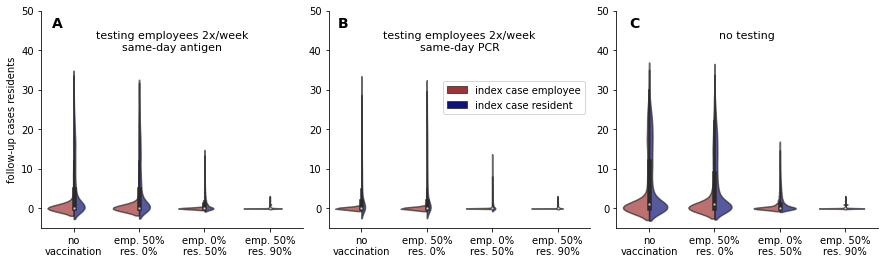

In [111]:
af.plot_violins2(ensmbls, 'infected_residents', testing_scenarios[[0, 1, 4]],
            vacc_scenario_labels[0:4], language, ymin=-5, ymax=50,
            variant='_masks')

**Testing**
* Employees screened 2x / week with antigen tests, residents never
* Employees screened 2x / week with PCR tests, residents never
* Employees screened 1x / week, residents screened 1x / week, both with antigen tests
* Employees screened 1x / week, residents screened 1x / week, both with PCR tests

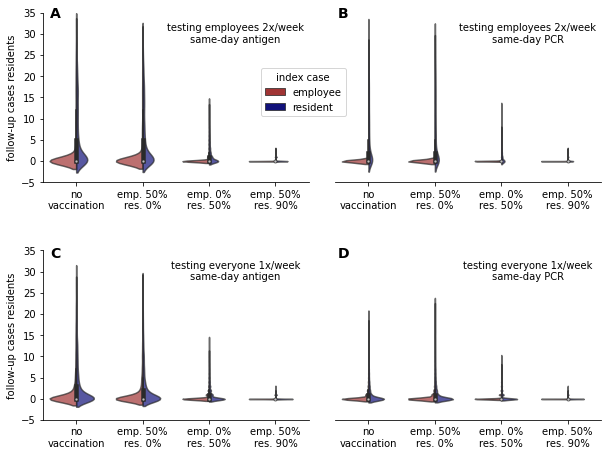

In [112]:
af.plot_violins(ensmbls, 'infected_residents', testing_scenarios[0:4],
             vacc_scenario_labels[0:4], language, ymin=-5, ymax=35,
             variant='_masks')

### Colormaps for different vaccination scenarios

#### Load the simulation results

In [113]:
N_runs = 5000
sim_name = 'simulations_testing_and_vaccination_masks_{}.csv'.format(N_runs)
res_path = '../data/simulation_results'
dst_path = '../plots'

In [114]:
data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
data['resident_screen_interval'] = data['resident_screen_interval']\
    .replace(frequency_name_map)
data['employee_screen_interval'] = data['employee_screen_interval']\
    .replace(frequency_name_map)

data = data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [115]:
N_runs = 5000
sim_name = 'simulations_testing_strategy_masks_{}.csv'.format(N_runs)

In [116]:
no_vacc_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_vacc_data['resident_screen_interval'] = no_vacc_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_screen_interval'] = no_vacc_data['employee_screen_interval']\
    .replace(frequency_name_map)
no_vacc_data['employee_vaccination_ratio'] = 0.0
no_vacc_data['resident_vaccination_ratio'] = 0.0

no_vacc_data = no_vacc_data.set_index(['test_type', 'index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

In [117]:
data = pd.concat([data, no_vacc_data])

In [118]:
N_runs = 5000
sim_name = 'simulations_vaccination_rate_masks_{}.csv'.format(N_runs)

In [119]:
no_test_data = pd.read_csv(join(res_path, sim_name))

# replace strings with strings that are nicer for plotting
no_test_data['resident_screen_interval'] = no_test_data['resident_screen_interval']\
    .replace(frequency_name_map)
no_test_data['employee_screen_interval'] = no_test_data['employee_screen_interval']\
    .replace(frequency_name_map)

no_test_data = no_test_data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio', 'employee_screen_interval', 
                       'resident_screen_interval'])

#### Plots

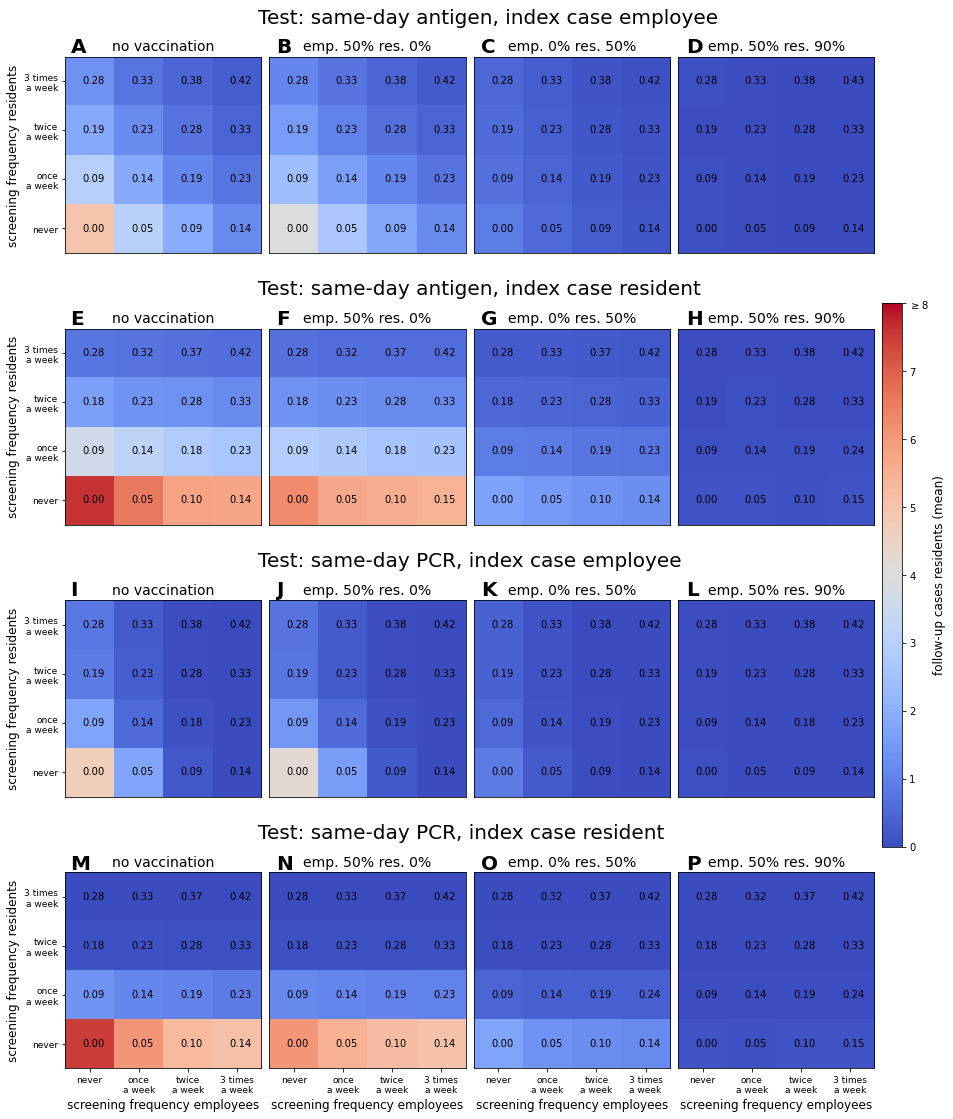

In [122]:
af.plot_testing_strategy_vaccination_scenario_grid(\
    data, 'infected_residents_mean', screening_intervals,
    vaccination_scenarios[0:4], vacc_scenario_labels, language,
    variant='_masks', vmax=8, vstep=1)

### Outbreak sizes

#### Antigen tests & 50% vaccinated residents

In [123]:
mean = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.3328 +- 1.1786101918772294


In [124]:
mean = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.3472 +- 2.168407839524591


#### PCR tests & 0% vaccinated residents, 0% vaccinated employees

In [125]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.2456 +- 1.8462833998274737


In [126]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

5.2514 +- 6.788506080350859


#### PCR tests & 0% vaccinated residents, 50% vaccinated employees

In [127]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.2522 +- 1.9099017526933129


In [128]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

5.2122 +- 6.718258565999967


#### PCR tests & 50% vaccinated residents

In [129]:
mean = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.0, 0.0, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.2456 +- 1.8462833998274737


In [130]:
mean = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.0, 0.5, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.2216 +- 1.9834516016407384


#### PCR tests & 90% vaccinated residents, 50% vaccinated employees

In [131]:
mean = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_PCR', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0058 +- 0.0858360854577685


In [132]:
mean = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_PCR', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.12919999999999998 +- 0.3785974474365102


#### Antigen tests & 90% vaccinated residents, 50% vaccinated employees

In [133]:
mean = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean']
std = data.loc['same_day_antigen', 'employee', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0266 +- 0.1786024069377364


In [134]:
mean = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_mean'] - 1
std = data.loc['same_day_antigen', 'resident', 0.5, 0.9, 'twice\na week', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.11759999999999993 +- 0.3602723958893437


#### No tests & 90% vaccinated residents, 50% vaccinated employees

In [135]:
mean = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_mean']
std = no_test_data.loc['employee', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.075 +- 0.3003215586795619


In [136]:
mean = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_mean'] - 1
std = no_test_data.loc['resident', 0.5, 0.9, 'never', 'never']['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1379999999999999 +- 0.3941916759845178
